# Assignment for Unit 1 content

This assignment is designed to make sure you have proficiency with viewing and manipulating sounds.      

In [15]:
import librosa  # For manipulating audio
import numpy as np
from IPython.display import Audio  # For displaying audio
import matplotlib.pyplot as plt

## Viewing audio

Choose a different example librosa file than the one used in the tutorial. 
1. Load it into an array using librosa. Print the first 20 elements of the array and the sample rate.
2. Display the audio's time-domain representation.
3. Display the discrete Fourier transform of its first 0.2 seconds of audio (this is likely more than 4096 samples. How can you compute the number of samples you need)? 
4. Identify the most prominent note in the first 0.2 seconds of audio.
5. Divide the sample rate by 2 (without resampling the audio) and recompute/display the new Fourier transform. What happens in the graph?
6. Display its mel-spectrogram. Write one sentence about how the spectrogram represents the changes in the sound over time.

In [18]:

array, sampling_rate = librosa.load(librosa.ex("vibeace"))
Audio(filename=librosa.ex("vibeace"))

In [23]:
print("First 20 samples of audio:")
print(array[0:20])
print()

First 20 samples of audio:
[-9.5918176e-06 -2.7743511e-06 -2.2453376e-06 -1.0107524e-06
  4.4018483e-07 -7.9402780e-06  3.5824498e-05 -1.1594068e-05
 -3.2438011e-06 -5.1494994e-06  7.7435766e-07  1.5995194e-05
 -7.3850867e-07 -1.0118451e-05 -8.0119326e-06  1.7480753e-06
 -1.0974882e-05  2.8969753e-05 -6.8411341e-06 -1.3281706e-05]



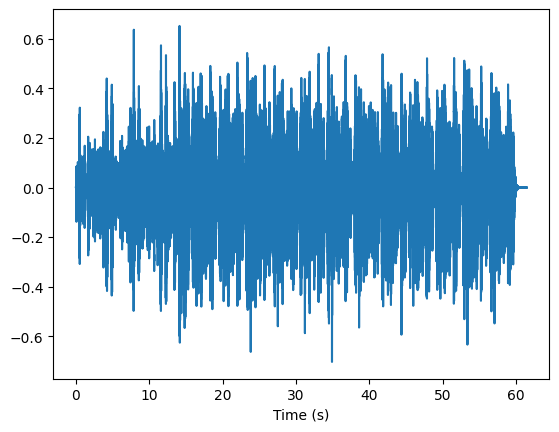

In [24]:
time = np.linspace(0, len(array)/sampling_rate, num=len(array))  
plt.plot(time, array)  
plt.xlabel("Time (s)")
plt.show()

The x-value at the highest y-value is: 85.0


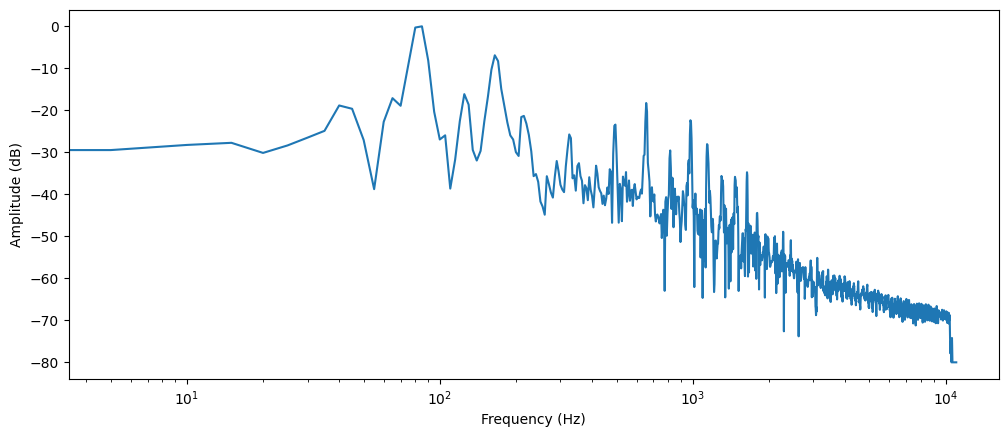

In [22]:
#3 Number of samples = Sample rate * Duration

dft_input = array[:4410]
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")
max_y_index = amplitude_db.argmax()
x_value_at_max_y = frequency[max_y_index]
print("The x-value at the highest y-value is:", x_value_at_max_y)

In [ ]:
#4. The fundamental frequency is at 85 hz, so the note is very close to f2 

The x-value at the highest y-value is: 42.5


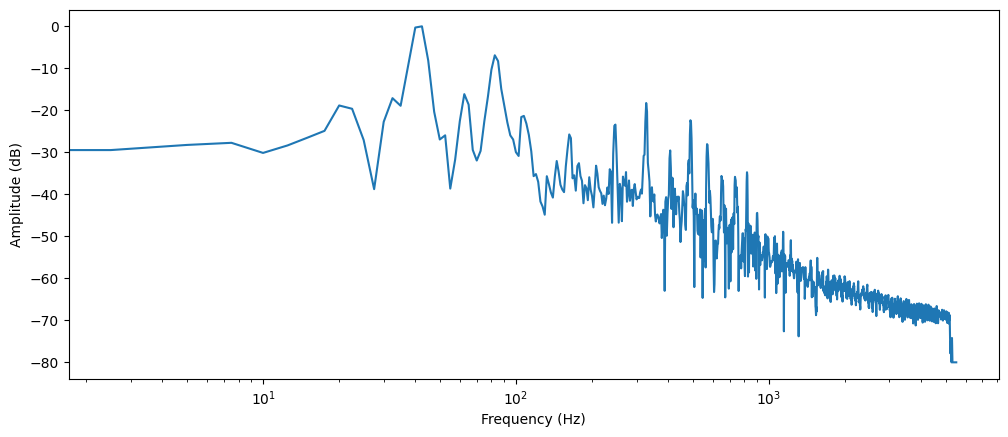

In [25]:
#5

dft_input = array[:4410]
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)
frequency = librosa.fft_frequencies(sr=(sampling_rate/2), n_fft=len(dft_input))
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")
max_y_index = amplitude_db.argmax()
x_value_at_max_y = frequency[max_y_index]
print("The x-value at the highest y-value is:", x_value_at_max_y)

In [ ]:
#5 There is a shift in the graph, now the fundamental frequency is half of what it was. But that is still the same note

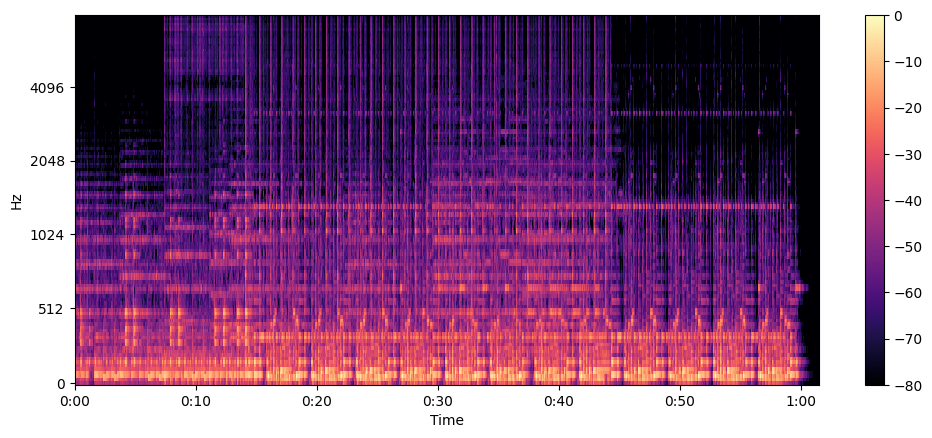

In [27]:
#6
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()


In [ ]:
#Frequncies that are the most prominent are closer to the yelow/orange/red colors. You can almost see when instruments are brought in, or taken out.

## Working with datasets

Choose a different dataset than the one used in the tutorial. Load it using the datasets library and print some of the attributes of a random example. If necessary, convert them to string representations.